In [1]:
# standard library imports
import pandas as pd
import numpy as np
import warnings
import sys
#import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats

# third party imports

# suppress warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
# graph output
%matplotlib inline

In [2]:
import os

os.chdir('E:/BikeShareResearch/ARIMA_MERGED')

In [3]:
# read in the csv data files

def getdata_csv(file):
    '''
    Args:
        csv file name
    Output:
        dataframe of the csv data
    '''

    outdf = pd.read_csv(file)
    return outdf

# read station data
df2 = getdata_csv('E:/BikeShareResearch/ARIMA_MERGED/Station.csv')

# read quarterly trip data
df1 = getdata_csv('E:/BikeShareResearch/ARIMA_MERGED/19mergedcsv.csv')




In [9]:
 #Number of rows
len(df1.index)

761689

In [4]:
df1.isna().sum()

Source.Name                0
trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_station              0
start_lat               2940
start_lon               2940
end_station                0
end_lat                13110
end_lon                13110
bike_id                    7
plan_duration            384
trip_route_category        0
passholder_type            0
dtype: int64

In [5]:
df2.isna().sum()

Station_ID      0
Station_Name    0
Go_live_date    0
Region          1
Status          0
dtype: int64

In [6]:
#Stations with Start latitud zero, deleteing those.
df1=df1[df1['start_lat']!=0]
df1.describe()
df1.columns
df1.start_station.nunique()
df2.Station_ID.nunique()

245

In [7]:
# Merge two datasets into one

df3=df1.set_index('start_station').join(df2.set_index('Station_ID'))

In [8]:
df3.tail()

,Source.Name,trip_id,duration,start_time,end_time,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,Station_Name,Go_live_date,Region,Status
4410,19_q2.csv,124642198,27,6/30/2019 19:28,6/30/2019 19:55,34.063351,-118.296799,4390,34.069271,-118.296593,17510.0,30.0,One Way,Monthly Pass,Kenmore & 6th,6/4/2019,DTLA,Active
4410,19_q2.csv,124643501,6,6/30/2019 20:18,6/30/2019 20:24,34.063351,-118.296799,4304,34.062580,-118.290092,6099.0,1.0,One Way,Walk-up,Kenmore & 6th,6/4/2019,DTLA,Active
4410,19_q2.csv,124643499,6,6/30/2019 20:19,6/30/2019 20:25,34.063351,-118.296799,4304,34.062580,-118.290092,6684.0,1.0,One Way,Walk-up,Kenmore & 6th,6/4/2019,DTLA,Active
4410,19_q2.csv,124646588,5,6/30/2019 21:26,6/30/2019 21:31,34.063351,-118.296799,4304,34.062580,-118.290092,18835.0,30.0,One Way,Monthly Pass,Kenmore & 6th,6/4/2019,DTLA,Active
4410,19_q2.csv,124656637,24,6/30/2019 23:05,6/30/2019 23:29,34.063351,-118.296799,4405,34.051899,-118.293678,16307.0,30.0,One Way,Monthly Pass,Kenmore & 6th,6/4/2019,DTLA,Active


In [9]:
df4 = df3.loc[:,('start_time','Region' , 'trip_id')]
df4['start_time'] = pd.to_datetime(df4.start_time, format = '%m/%d/%Y %H:%M' )
df4['Day'] = df4.start_time.dt.dayofweek
df4['Date'] = df4.start_time.dt.day
df4['Month'] = df4.start_time.dt.month
df4['Hour'] = df4.start_time.dt.hour
df4['Year'] = df4.start_time.dt.year
df4.groupby(['Day','Year'])['trip_id'].count()

Day  Year
0    2016    12909
     2017    30885
     2018    43745
     2019    16684
1    2016    14296
     2017    32861
     2018    45127
     2019    18229
2    2016    14480
     2017    33492
     2018    43563
     2019    17785
3    2016    15230
     2017    33580
     2018    44024
     2019    18554
4    2016    15256
     2017    34744
     2018    46019
     2019    19979
5    2016    13498
     2017    32493
     2018    44546
     2019    15602
6    2016    12936
     2017    31200
     2018    44870
     2019    15070
Name: trip_id, dtype: int64

In [10]:
df4.head()

,start_time,Region,trip_id,Day,Date,Month,Hour,Year
3000,2016-10-09 09:40:00,NaN,9378284,6,9,10,9,2016
3000,2016-10-09 12:57:00,NaN,9399178,6,9,10,12,2016
3000,2016-10-09 13:27:00,NaN,9399168,6,9,10,13,2016
3000,2016-10-09 13:29:00,NaN,9399161,6,9,10,13,2016
3000,2016-10-09 14:30:00,NaN,9404478,6,9,10,14,2016


In [11]:
#DDown Town Los angeles trip count
Data_DTLA = df4.loc[df4['Region']=='DTLA',:]
Data_DTLA.index = Data_DTLA.start_time
Data_DTLA_D = Data_DTLA.resample('D').count()
Data_DTLA_D = Data_DTLA_D.rename(columns={'Region':'trips'})
Data_DTLA_D=Data_DTLA_D.drop(Data_DTLA_D.columns[[0,2,3,4,5,6,7]],axis=1)
Data_DTLA_D

,trips
start_time,
2016-07-07,190
2016-07-08,341
2016-07-09,416
2016-07-10,331
2016-07-11,347
2016-07-12,531
2016-07-13,534
2016-07-14,570
2016-07-15,484


In [12]:
Data_DTLA_D.tail()

,trips
start_time,
2019-06-26,836
2019-06-27,975
2019-06-28,810
2019-06-29,566
2019-06-30,639


Text(0, 0.5, 'Number of trips')

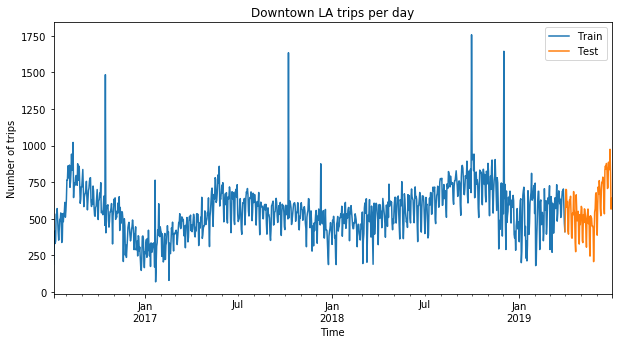

In [13]:
#dividing the data into training and test
import matplotlib.pyplot as plt
train_DTLA = Data_DTLA_D.loc['2016-07-01':'2019-03-31']
test_DTLA = Data_DTLA_D.loc['2019-03-31':]
train_DTLA.shape,test_DTLA.shape
train_DTLA.trips.plot(label = 'Train')
test_DTLA.trips.plot(label="Test", figsize = (10,5))
plt.legend()
plt.title('Downtown LA trips per day')
plt.xlabel('Time')
plt.ylabel('Number of trips')

In [14]:
# taking the combination of parameters
import itertools
p = d = q = range(0,3)
pdq=list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 28) for x in list(itertools.product(p, d, q))]

In [28]:
#Gridsearch to look for best parameter to fit the model, It takes more than 8 hours to run
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore") 
arr=[]
min_aic = 1e64
for param in pdq:
 for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(Data_DTLA_D,
                                            order=param,
                                            seasonal_order=param_seasonal, enforce_invertibility=False,
                                            enforce_stationarity=False
                                            )

            results = mod.fit()
            arr.append(results.aic)
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < min_aic:
                min_aic = results.aic
                best_param,best_param_seasonal = param, param_seasonal

print(min(arr), 'ARIMA{}x{} - AIC:{}'.format(best_param, best_param_seasonal))

ARIMA(0, 0, 0)x(0, 0, 0, 28) - AIC:16925.0667136528
ARIMA(0, 0, 0)x(0, 0, 1, 28) - AIC:15550.44036662218


KeyboardInterrupt: 

In [15]:

# Fitting the parameters into the model and evaluating the model
import statsmodels.api as sm
import matplotlib.pyplot as plt
mod = sm.tsa.statespace.SARIMAX(train_DTLA,
                                order=(1,0,1),
                                seasonal_order=(1, 2, 2,28),
                                enforce_invertibility=False,
                               enforce_stationarity=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9852      0.009    111.825      0.000       0.968       1.002
ma.L1         -0.7964      0.024    -33.109      0.000      -0.844      -0.749
ar.S.L28       0.0387      0.023      1.692      0.091      -0.006       0.083
ma.S.L28      -1.9881      0.017   -115.544      0.000      -2.022      -1.954
ma.S.L56       1.0000      0.022     44.904      0.000       0.956       1.044
sigma2      1.294e+04   3.02e-06   4.28e+09      0.000    1.29e+04    1.29e+04


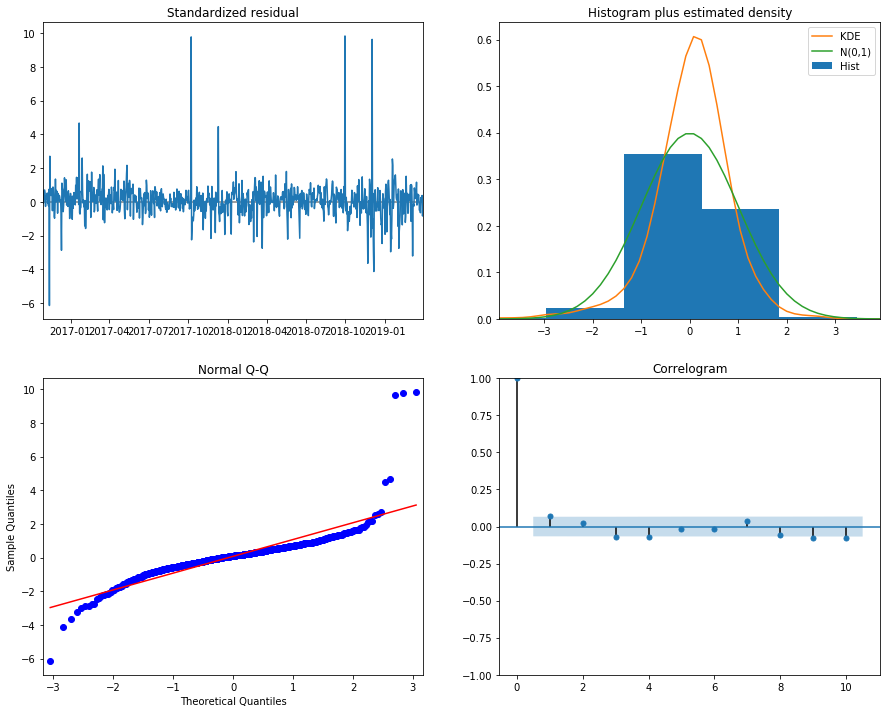

In [16]:
# Residual Diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

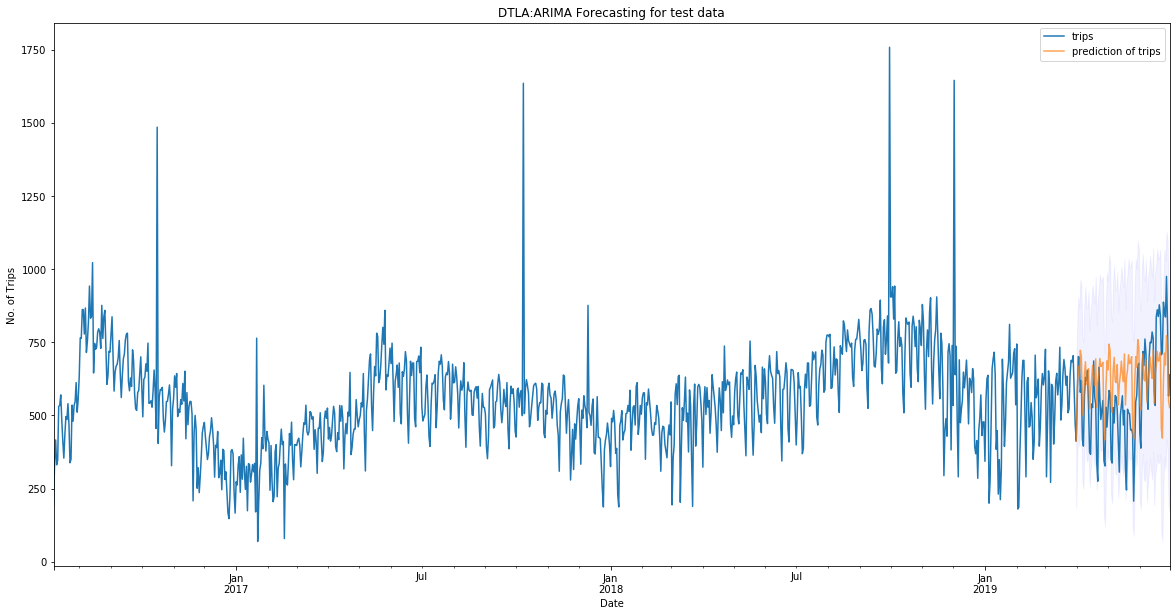

In [18]:
#forecasting on test data
pred1 = results.get_prediction(start='2019-03-31', end='2019-06-30', dynamic=False)
pred1_ci = pred1.conf_int()
ax=Data_DTLA_D.plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='prediction of trips', alpha=.7, figsize=(20,10))
ax.fill_between(pred1_ci.index,
                pred1_ci.iloc[:, 0],
                pred1_ci.iloc[:, 1], color='b', alpha=0.05)

ax.set_xlabel('Date')
ax.set_ylabel('No. of Trips')
ax.set_title("DTLA:ARIMA Forecasting for test data")
plt.legend()

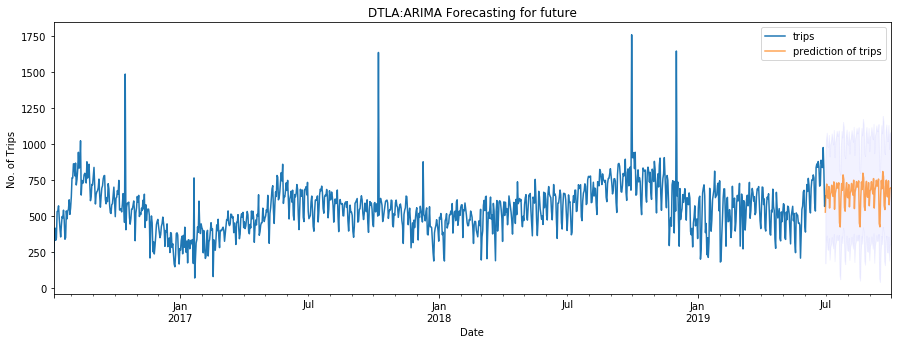

In [19]:

#forecasting beyond the data given
pred = results.get_prediction(start='2019-06-30', end='2019-09-30', dynamic=False)
pred_ci = pred.conf_int()
ax=Data_DTLA_D.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='prediction of trips', alpha=.7, figsize=(15,5))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='b', alpha=0.05)

ax.set_xlabel('Date')
ax.set_ylabel('No. of Trips')
ax.set_title("DTLA:ARIMA Forecasting for future")
plt.legend()

In [20]:
#Actual number of trips for validation data
y_truth = Data_DTLA_D['2019-03-31':]
y_truth

,trips
start_time,
2019-03-31,412
2019-04-01,561
2019-04-02,701
2019-04-03,698
2019-04-04,579
2019-04-05,618
2019-04-06,417
2019-04-07,395
2019-04-08,566


In [21]:
y_future=pred.predicted_mean
y_future

2019-06-30    526.566005
2019-07-01    675.699851
2019-07-02    721.059695
2019-07-03    627.233719
2019-07-04    622.562591
2019-07-05    704.084085
2019-07-06    554.914906
2019-07-07    640.284872
2019-07-08    662.746823
2019-07-09    713.239530
2019-07-10    668.415299
2019-07-11    635.610153
2019-07-12    736.381078
2019-07-13    546.628089
2019-07-14    654.946138
2019-07-15    681.167144
2019-07-16    728.881306
2019-07-17    693.390329
2019-07-18    696.731358
2019-07-19    730.037928
2019-07-20    452.470380
2019-07-21    423.559176
2019-07-22    624.643639
2019-07-23    724.716558
2019-07-24    678.124065
2019-07-25    785.089616
2019-07-26    754.397150
2019-07-27    558.525253
2019-07-28    532.993000
2019-07-29    685.380613
                 ...    
2019-09-01    672.221689
2019-09-02    684.198415
2019-09-03    737.628203
2019-09-04    691.125566
2019-09-05    652.875286
2019-09-06    759.445957
2019-09-07    554.779097
2019-09-08    677.469964
2019-09-09    703.611574


In [22]:
y_forecast=pred1.predicted_mean
y_forecast

2019-03-31    412.368557
2019-04-01    590.948078
2019-04-02    668.353063
2019-04-03    631.452017
2019-04-04    722.705647
2019-04-05    702.355495
2019-04-06    518.139171
2019-04-07    499.617781
2019-04-08    638.821289
2019-04-09    683.290911
2019-04-10    608.220877
2019-04-11    604.433373
2019-04-12    659.397094
2019-04-13    522.729894
2019-04-14    583.572633
2019-04-15    624.173300
2019-04-16    670.651578
2019-04-17    628.853921
2019-04-18    602.962330
2019-04-19    692.885200
2019-04-20    526.953227
2019-04-21    611.274435
2019-04-22    641.176929
2019-04-23    694.498168
2019-04-24    666.738811
2019-04-25    672.735345
2019-04-26    681.196007
2019-04-27    453.567233
2019-04-28    416.044579
2019-04-29    599.969819
                 ...    
2019-06-01    543.359527
2019-06-02    519.207970
2019-06-03    665.101452
2019-06-04    710.373772
2019-06-05    622.847057
2019-06-06    617.859337
2019-06-07    689.465472
2019-06-08    546.018443
2019-06-09    623.200166


In [23]:
y_truth = test_DTLA #Actual number of trips for validation data
y_forecasted = pred1.predicted_mean #Predicted number of trips for validation data
y_future= pred.predicted_mean #predicted  number of trips for next  quarter

In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_truth, y_forecasted)

128.52849103405177

In [25]:
from sklearn.metrics import r2_score
r2_score(y_truth, y_forecasted)

0.12906860820638055

In [26]:
import numpy as np

def mean_absolute_percentage_error(y_truth, y_forecasted):
    
    y_truth, y_forecasted = np.array(y_truth), np.array(y_forecasted)
    return np.mean(np.abs((y_truth - y_forecasted) / y_true)) * 100

In [32]:

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_truth, y_forecasted)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 150.145498


In [35]:
y_forecast.to_excel('C:/Users/Parvez/Desktop/DataMinePPT/DTLAforecast.xlsx')

In [36]:
y_truth.to_excel('C:/Users/Parvez/Desktop/DataMinePPT/DTLAtruth.xlsx')